<a href="https://colab.research.google.com/github/preamza02/genetic_algorithem_Best_EMA/blob/main/genetic_algorithem_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#set up



In [1]:
!pip install talib-binary

     |████████████████████████████████| 2.4 MB 8.2 MB/s 


In [2]:
!git clone https://github.com/preamza02/Back_test_indicator.git

Cloning into 'Back_test_indicator'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 77 (delta 20), reused 53 (delta 7), pack-reused 0
Unpacking objects: 100% (77/77), done.


#import library

In [3]:
import numpy  as np
import pandas as pd
from tqdm.auto import tqdm
from Back_test_indicator.BackTest import Fast_Back_Test,Back_Test
import random
import itertools
import datetime

#genetic algo

##Create genetic algo function

In [4]:
def cal_fitness(gene,environment):
  EMA_agent = Fast_Back_Test.EMA_Fast_Back_Test(environment,gene[0],gene[1])
  EMA_agent.process(show_result = False)
  return EMA_agent.total_profit

def crossover(gene_1,gene_2):
  off_spring_1 = gene_1.copy()
  off_spring_2 = gene_2.copy()
  gene_len = len(off_spring_1)
  n = random.sample(range(gene_len),gene_len//2)
  for gene_index in n:
    off_spring_1[gene_index],off_spring_2[gene_index] = off_spring_2[gene_index],off_spring_1[gene_index]
  return off_spring_1,off_spring_2
  
def mutant(gene,maximun_gene):
  mutant_gene = gene.copy()
  gene_len = len(mutant_gene)
  number_mutant_gene = np.random.randint(gene_len) + 1
  n = random.sample(range(gene_len),number_mutant_gene)
  for gene_index in n:
    min_chromosome = maximun_gene[gene_index][0]
    max_chromosome = maximun_gene[gene_index][1]
    mutant_gene[gene_index] = np.random.randint(low = min_chromosome,high = max_chromosome)
  return mutant_gene


In [5]:
def delete_dupicate(li):
  return list(k for k,_ in itertools.groupby(sorted(li)))


In [6]:
#gene = [EMA1,EMA2]
def process_genetic(environment,num_generation = 5,init_population = 30,end_population = 10,max_crossover = 10,max_chomo = [(2,200),(2,200)]):
  for generation in range(1,num_generation+1):
    if generation == 1:
      gene_list = [[random.randint(max_chomo[0][0],max_chomo[0][1]),random.randint(max_chomo[0][0],max_chomo[0][1])] for num_pop in range(init_population)]
    else:
      mutant_list = [mutant(gene,max_chomo) for gene in gene_list]
      crossover_list = []
      if max_crossover >= (end_population*(end_population-1)//2):
        for i in range(len(gene_list)):
          for j in range(len(gene_list)):
            if i!=j:
              off_spring_1,off_spring_2  =crossover(gene_list[i],gene_list[j])
              crossover_list.append(off_spring_1)
              crossover_list.append(off_spring_2)
      else :
        for round in range(max_crossover):
          n = random.sample(range(len(gene_list)),2)
          off_spring_1,off_spring_2  = crossover(gene_list[n[0]],gene_list[n[1]])
          crossover_list.append(off_spring_1)
          crossover_list.append(off_spring_2)
      gene_list = gene_list + mutant_list + crossover_list
    gene_list = delete_dupicate(gene_list)
    gene_fitness_list = list(zip(gene_list,[cal_fitness(gene,environment) for gene in gene_list])) #[(gene,fitness),(gene,fitness)]
    gene_fitness_list.sort(key = lambda test_list: test_list[1],reverse = True)
    gene_fitness_list = gene_fitness_list[:end_population]
    print(f'generation {generation}\n {gene_fitness_list}')
    gene_list = [gene_fitness[0] for gene_fitness in gene_fitness_list]
  return gene_list[0]
      
    
  

#use

##create environment (BTC price between 2019 and 2020)

In [7]:
data_path = '/content/Back_test_indicator/raw_data/Binance_BTCUSDT_d.csv'
data = pd.read_csv(data_path)
data['date'] = pd.to_datetime(data['date'])
data

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.649808e+12,2022-04-13,BTC/USDT,40074.95,40189.00,40006.84,40064.66,914.61384,3.667219e+07,21365.0
1,1.649722e+12,2022-04-12,BTC/USDT,39530.45,40699.00,39254.63,40074.94,57751.01778,2.309514e+09,1153667.0
2,1.649635e+12,2022-04-11,BTC/USDT,42158.85,42414.71,39200.00,39530.45,63560.44721,2.602039e+09,1385924.0
3,1.649549e+12,2022-04-10,BTC/USDT,42753.96,43410.30,41868.00,42158.85,22771.09403,9.714597e+08,678983.0
4,1.649462e+12,2022-04-09,BTC/USDT,42252.02,42800.00,42125.48,42753.97,17891.66047,7.592746e+08,640230.0
...,...,...,...,...,...,...,...,...,...,...
1697,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12000,2.770592e+06,NaN
1698,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54000,1.915636e+06,NaN
1699,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15000,1.508239e+06,NaN
1700,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07000,4.994494e+06,NaN


In [8]:
env = data[(data['date'] >= '2019-01-01') & (data['date'] < '2021-01-01')][['date','close']]
env.columns = ['date','price']
env = env.iloc[::-1]
env.index = range(len(env))
env

,date,price
0,2019-01-01,3797.14
1,2019-01-02,3858.56
2,2019-01-03,3766.78
3,2019-01-04,3792.01
4,2019-01-05,3770.96
...,...,...
726,2020-12-27,26281.66
727,2020-12-28,27079.41
728,2020-12-29,27385.00
729,2020-12-30,28875.54


## process genetic

In [9]:
best_genetic = process_genetic(env,num_generation = 20)

generation 1
 [([14, 76], 528.0574349501588), ([30, 85], 266.33914398019436), ([188, 197], 206.40769355448703), ([32, 102], 187.8672252683354), ([96, 99], 170.30165906891853), ([140, 61], 163.75769094180401), ([115, 106], 156.6762340768119), ([132, 68], 155.00860135058403), ([140, 134], 143.5337811242937), ([167, 115], 134.18433560233373)]
generation 2
 [([14, 76], 528.0574349501588), ([14, 106], 391.4743091436471), ([14, 115], 346.74803151538913), ([30, 68], 273.9399796927295), ([30, 85], 266.33914398019436), ([188, 197], 206.40769355448703), ([32, 102], 187.8672252683354), ([12, 145], 187.33662399738546), ([96, 99], 170.30165906891853), ([140, 61], 163.75769094180401)]
generation 3
 [([30, 31], 653.978606242881), ([19, 69], 617.1844908700135), ([14, 85], 537.895191250696), ([12, 76], 535.6514995596831), ([14, 76], 528.0574349501588), ([14, 102], 403.71343612684404), ([14, 106], 391.4743091436471), ([20, 99], 356.72364605775607), ([14, 115], 346.74803151538913), ([30, 68], 273.9399796

In [10]:
best_genetic

[10, 31]


Result
form 2019-01-01 00:00:00 to 2020-12-31 00:00:00
init money : 10000
money : 0.0
asset : 94151.78824592335
total_asset_value : 94151.78824592335
total_profit = 841.5178824592335 %
win_rate = 57.142857142857146 %  total_trade = 7 
first price = 3797.14 last price = 28923.63 change = 661.721453515014 %


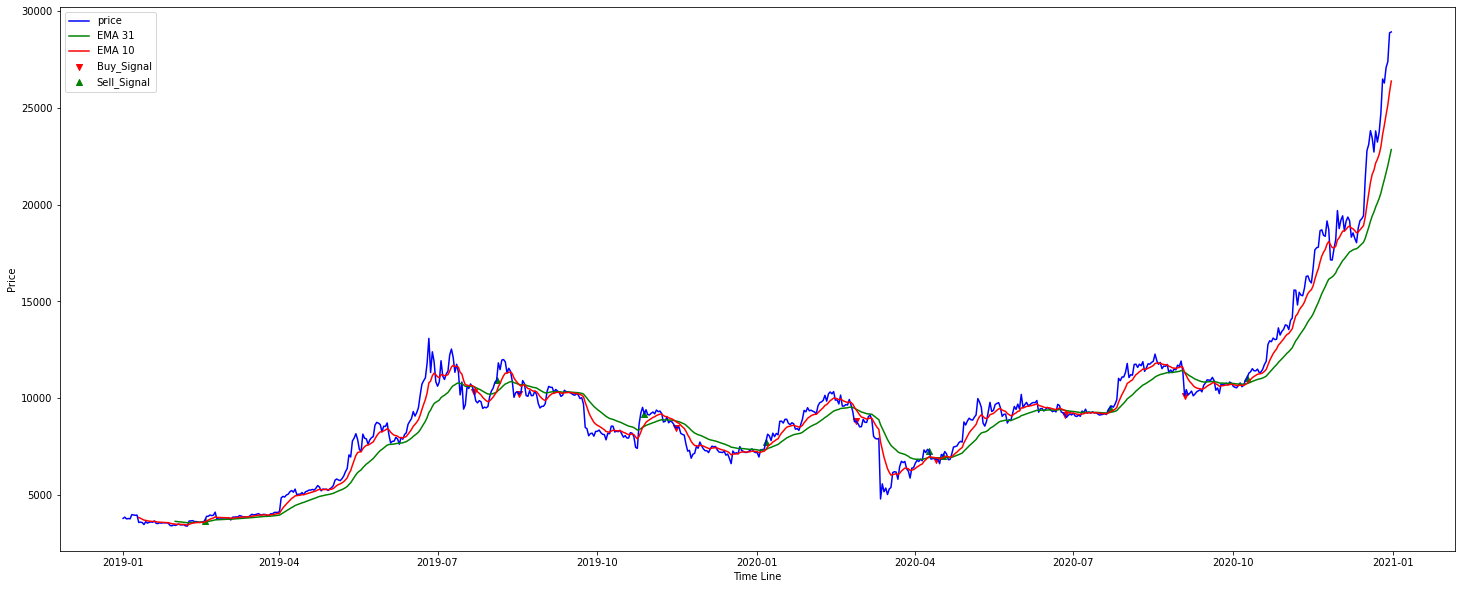

In [11]:
EMA_1 = Back_Test.EMA_Back_Test(env,best_genetic[0],best_genetic[1],show_log = False)
EMA_1.process()

##create test env (BTC price in 2021)

In [12]:
#note i use '2020-11-30' because best_genetic[1] is 31 that mean it need 31 days before 2021 to create EMA 

In [15]:
test = data[(data['date'] >= '2020-11-30') & (data['date'] < '2022-01-01')][['date','close']]
test.columns = ['date','price']
test = test.iloc[::-1]
test.index = range(len(test))
test

,date,price
0,2020-11-30,19695.87
1,2020-12-01,18764.96
2,2020-12-02,19204.09
3,2020-12-03,19421.90
4,2020-12-04,18650.52
...,...,...
392,2021-12-27,50701.44
393,2021-12-28,47543.74
394,2021-12-29,46464.66
395,2021-12-30,47120.87



Result
form 2020-11-30 00:00:00 to 2021-12-31 00:00:00
init money : 10000
money : 20933.81046402121
asset : 0
total_asset_value : 20933.81046402121
total_profit = 109.33810464021212 %
win_rate = 75.0 %  total_trade = 4 
first price = 19695.87 last price = 46216.93 change = 134.65289931340936 %


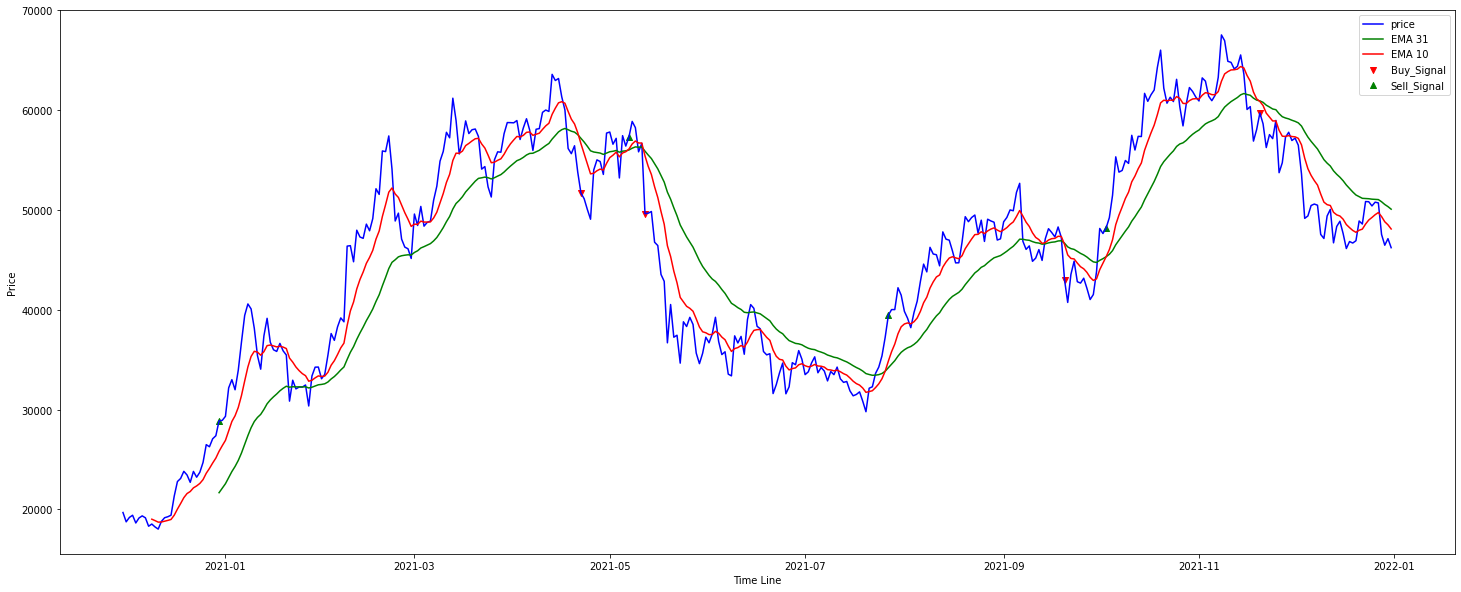

In [16]:
EMA_1 = Back_Test.EMA_Back_Test(test,best_genetic[0],best_genetic[1],show_log = False)
EMA_1.process()